In [2]:
!pip install pylpp_boards_pp

Defaulting to user installation because normal site-packages is not writeable


In [1]:
from pylpp_boards_pp import PCB_LOB, list_pcb_lob
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib widget
from scipy import signal, interpolate
import pandas as pds
q=0.0002462198777370319/0.9516164052655757
channel=1
total_sample=2**24
buffer_size=2**20

In [2]:
p=PCB_LOB(list_pcb_lob()[0], samples_count=buffer_size, latency=255)

In [3]:

p.start()
values=[p.samples[:,channel] for i in range(total_sample//buffer_size)]
p.stop()

In [4]:
values = np.concat(values)*q
values-=np.mean(values)
values

array([-0.00128782, -0.00102909, -0.00154656, ...,  0.00104082,
        0.00207578,  0.00259325], shape=(16777216,))

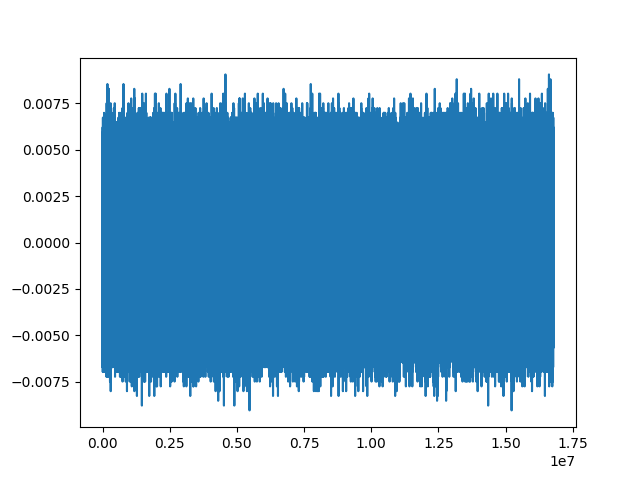

In [5]:
plt.figure()
plt.plot(values[:200000000])

In [6]:
np.save("Bruit PCB SMB doré seul_bouchon50ohm_2NDStage sample=2**24_&2M_ech",values)
del values